Importing the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv('C:/Users/Aditya/Desktop/Projects/Facial Expression Recognition/Excavate IIT Kharagpur/GLASS_DATA.csv')
df.head()

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3


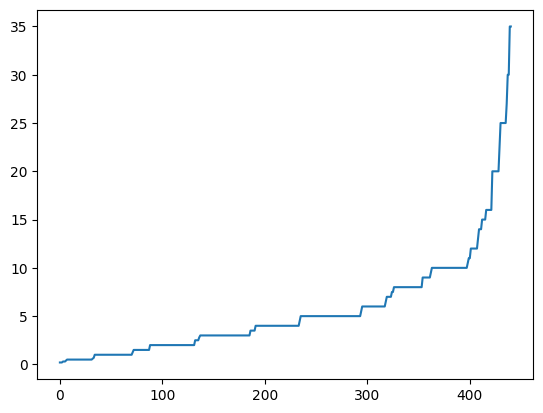

In [5]:
plt.plot(df.Dmax)

Removing the outlier cases at the extremum.

In [6]:
df1=df.head(400)
df1.head()

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3


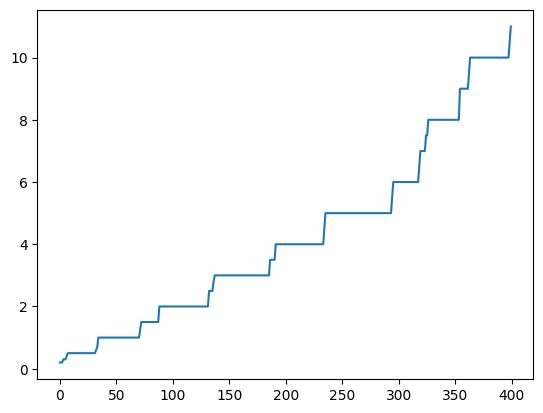

In [7]:
plt.plot(df1.Dmax)

In [8]:
X=df1.drop(['Alloy','Dmax'],axis=1)
X

,Tg,Tx,Tl,TEN,VA,d,Sm
0,670.0,708.0,1226.0,1.76,13.27,0.10,7.90
1,630.0,689.0,1200.0,1.48,18.38,0.13,7.92
2,640.0,710.0,1220.0,1.48,18.11,0.15,8.05
3,407.0,439.0,809.0,1.48,16.48,0.10,8.79
4,428.0,488.0,843.0,1.59,15.55,0.10,9.45
...,...,...,...,...,...,...,...
395,790.0,875.0,1278.0,1.58,15.19,0.16,11.05
396,785.0,874.0,1280.0,1.58,15.34,0.16,10.93
397,625.0,707.0,1171.0,1.48,18.29,0.14,8.46
398,413.0,459.0,729.0,1.36,25.99,0.23,10.91


In [9]:
y=df1.Dmax
y

0       0.2
1       0.2
2       0.2
3       0.3
4       0.3
       ... 
395    10.0
396    10.0
397    10.0
398    10.5
399    11.0
Name: Dmax, Length: 400, dtype: float64

Use the Repeated K-fold CV with Random Forest

In [10]:
from sklearn.model_selection import RepeatedKFold

# Initialize the repeated K-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)

# Initialize lists to store performance metrics
mse_scores_rf = []

# Iterate through each fold and repetition
for train_index, test_index in rkf.split(X):
    # Split the data into training and testing sets
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the Random Forest regressor
    rf_model = RandomForestRegressor(random_state=0)
    rf_model.fit(x_train, y_train)

    # Make predictions on the testing set
    y_pred = rf_model.predict(x_test)
    # Calculate Mean Squared Error (MSE) and append to the list
    mse = mean_squared_error(y_test, y_pred)
    mse_scores_rf.append(mse)

# Calculate and print the average MSE across all folds and repetitions

mse_rf = np.mean(mse_scores_rf)
mserrr=np.std(mse_scores_rf)
print(f'Mean Squared Error for Repeated K-fold Cross-Validation Random Forest Regression: {mse_rf}')
print('The predicted value of std dev given input is ', mserrr)

Mean Squared Error for Repeated K-fold Cross-Validation Random Forest Regression: 4.10295742454
The predicted value of std dev given input is  0.6832563406947816


Create the function to give the predicted value of Dmax.

In [11]:
def predict_Dmax(Tg,Tx,Tl,TEN,VA,d,Sm):
  input_values=[Tg,Tx,Tl,TEN,VA,d,Sm]
  final_pred=np.mean(rf_model.predict([input_values]))
  return final_pred

Now predict the values of Dmax using the above Dmax

In [12]:
predict_Dmax(622,662,1009,1.62,14.12,0.19,12.57)
# The correct answer is 6.

c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


5.4468000000000005